# TP1 - Axel Garino -  12731
### Dataset: HeartData (Dataset de ataques al corazón)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("heartData.csv")

# 1) Visualizar datos

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Podemos ver que todas nuestras variables son categoricas

In [33]:
# Aseguro que todos los datos esten completos
df.isnull().values.any()

False

In [4]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [5]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [6]:
# Ver sumarizaciones
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [28]:
# Visualizo la diferente correlacion entre los datos
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [7]:
#Ver cantidad de mujeres y hombres hay en nuestro dataset
resultado = df["sex"].value_counts()
print("0 = Mujeres")
print("1 = Hombres")
resultado

0 = Mujeres
1 = Hombres


1    207
0     96
Name: sex, dtype: int64

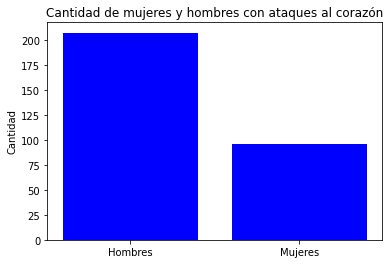

In [8]:
#Grafico 
import matplotlib.pyplot as plt

plt.bar(["Hombres","Mujeres"], resultado, color='blue')
plt.ylabel("Cantidad")
plt.title("Cantidad de mujeres y hombres con ataques al corazón")
plt.show()

In [9]:
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
#import torch
#import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

print('Packages imported...')

Packages imported...


In [10]:
# creating a copy of df
df1 = df

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is ", X_train.shape)
print("The shape of X_test is ",X_test.shape)
print("The shape of y_train is ",y_train.shape)
print("The shape of y_test is ",y_test.shape)

The shape of X_train is  (242, 22)
The shape of X_test is  (61, 22)
The shape of y_train is  (242, 1)
The shape of y_test is  (61, 1)


In [12]:
#Probamos entrenar...
from sklearn import neighbors

clf_sk = neighbors.KNeighborsClassifier(n_neighbors=3, p=1) #Siempre elijo cantidad de vecinos impar
clf_sk.fit(X_train,y_train)
y_hat = clf_sk.predict(X_test)

In [13]:
# Ver métricas de rendimiento
from sklearn.metrics import accuracy_score

accuracy =accuracy_score(y_true=y_test, y_pred=y_hat)
print('Tasa de aciertos con los datos sin escalar: ', accuracy_score(y_true=y_test, y_pred=y_hat))

Tasa de aciertos con los datos sin escalar:  0.7213114754098361


# 4) Normalizar características ¿mejora haciendo eso?

In [14]:
# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is ", X_train.shape)
print("The shape of X_test is ",X_test.shape)
print("The shape of y_train is ",y_train.shape)
print("The shape of y_test is ",y_test.shape)

The shape of X_train is  (242, 22)
The shape of X_test is  (61, 22)
The shape of y_train is  (242, 1)
The shape of y_test is  (61, 1)


In [16]:
#Probamos entrenar...
from sklearn import neighbors

clf_sk = neighbors.KNeighborsClassifier(n_neighbors=3, p=1) #Siempre elijo cantidad de vecinos impar
clf_sk.fit(X_train,y_train)
y_hat = clf_sk.predict(X_test)

In [17]:
# Ver métricas de rendimiento
from sklearn.metrics import accuracy_score

accuracy =accuracy_score(y_true=y_test, y_pred=y_hat)
print('Tasa de aciertos con los datos escalados: ', accuracy_score(y_true=y_test, y_pred=y_hat))

Tasa de aciertos con los datos escalados:  0.8360655737704918


# 5) Optimizar hiperparametros ¿cuánto mejora?

### Voy a utilizar GridSearchCV de sklearn para encontrar los mejores hipermarámetros

In [34]:
from sklearn.model_selection import GridSearchCV 

#Paso paramétros que obtuve de la documentacionde sklearn, los cuales son:
#Cantidad de vecinos, el peso de los vecinos, la media de la distancia
grid_params = {'n_neighbors': range(1,50), 'weights': ['uniform', 'distance'], 'metric':['euclidean' , 'manhattan']}

#Ahora al GridSherch le paso los siguientes parámetros:
#Modelo a utilizar, parametros grid para que pruebe, verbose muestra mensajes, 
#cv es la cantidad de folds y n_jobs es la cantidad de trabajo en paralelo (con -1 uso todos)
gs = GridSearchCV(neighbors.KNeighborsClassifier(), grid_params, verbose = 1, cv = 3, n_jobs = -1 )

#Utilizamos los datos sin normalizar
gs_results = gs.fit(X_train, y_train) 

Fitting 3 folds for each of 196 candidates, totalling 588 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 588 out of 588 | elapsed:    8.0s finished


In [19]:
#Mejor puntaje
gs_results.best_score_

0.8142489711934155

In [20]:
#Mejor estimador
gs_results.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [21]:
#Mejores parametros
gs_results.best_params_

{'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}

# 6) Aplicar modelos más complejos ¿mejora con modelos más complejos?


In [22]:
#Utilizo datos normalizados con RandomForest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10,criterion = "entropy", random_state=80)

classifier.fit(X_train,y_train)
# Predijo los resultados del conjunto de prueba
y_hat = classifier.predict(X_test)
print('Tasa de aciertos: ', accuracy_score(y_true=y_test, y_pred=y_hat))

Tasa de aciertos:  0.8360655737704918


In [23]:
#Utilizo datos normalizados con Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier.fit(X_train,y_train)

#Predijo los resultados del conjunto de prueba
y_hat = classifier.predict(X_test)
print('Tasa de aciertos: ', accuracy_score(y_true=y_test, y_pred=y_hat))

Tasa de aciertos:  0.6885245901639344


# 7) Uso de kfolds

In [49]:
# Utilizo kfold mediante la libreria

from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10)
model_kfold = neighbors.KNeighborsClassifier(metric= 'euclidean', n_neighbors= 6, weights= 'uniform')
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 76.50%


In [50]:
#Resultado que nos arroja cada fold del algoritmo
results_kfold

array([0.68      , 0.72      , 0.75      , 0.79166667, 0.83333333,
       0.70833333, 0.75      , 0.875     , 0.75      , 0.79166667])

In [ ]:
# APLICO

In [60]:
from sklearn.decomposition import PCA
pca = PCA(0.85)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print('PCA matrix train shape es: ', X_train_pca.shape)

PCA matrix train shape es:  (242, 10)


In [61]:
# Utilizo kfold mediante la libreria

from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10)
model_kfold = neighbors.KNeighborsClassifier(metric= 'euclidean', n_neighbors= 6, weights= 'uniform')
results_kfold = model_selection.cross_val_score(model_kfold, X_train_pca, y_train, cv=kfold)

print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 76.50%


In [62]:
#Resultado que nos arroja cada fold del algoritmo
results_kfold

array([0.68      , 0.72      , 0.75      , 0.79166667, 0.83333333,
       0.70833333, 0.75      , 0.875     , 0.75      , 0.79166667])

### Podemos observar que al aplicar PCA para reducir las columnas, el resultado con kfold no mejoró pero podemos ver que el modelo obtuvo el mismo resultado con menos datos